## Proyecto 3 – Agrupación de datos sobre obesidad
### Mario Guerra Gualy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import os

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Se trabajará con una dataset que muestra los niveles de obesidad de los paieses mexico, peru y colombia, en funcion de sus habitos alimenticios y cpondicion fisica. A continuación se presenta una breve descripcion de los datos 

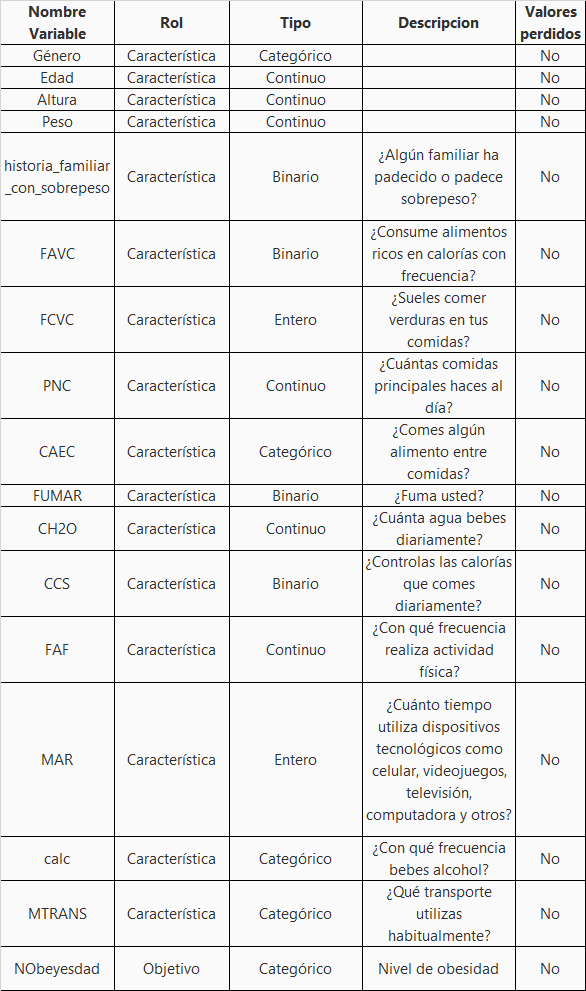

In [3]:
df=pd.read_csv("datos/ObesityDataSet_raw_and_data_sinthetic.csv", sep=",")


In [4]:
df.columns=["genero","edad","altura","peso","hist_sobrepeso","a_calorias","a_verduras","n_comidas","entrecomidas","fuma","agua","control_caloria","actividad_fisica","tiempo_tecnologia","alcohol","medio_transporte","nivel_obe"]
df

,genero,edad,altura,peso,hist_sobrepeso,a_calorias,a_verduras,n_comidas,entrecomidas,fuma,agua,control_caloria,actividad_fisica,tiempo_tecnologia,alcohol,medio_transporte,nivel_obe
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.drop(['altura','peso'],axis=1,inplace=True)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genero             2111 non-null   object 
 1   edad               2111 non-null   float64
 2   hist_sobrepeso     2111 non-null   object 
 3   a_calorias         2111 non-null   object 
 4   a_verduras         2111 non-null   float64
 5   n_comidas          2111 non-null   float64
 6   entrecomidas       2111 non-null   object 
 7   fuma               2111 non-null   object 
 8   agua               2111 non-null   float64
 9   control_caloria    2111 non-null   object 
 10  actividad_fisica   2111 non-null   float64
 11  tiempo_tecnologia  2111 non-null   float64
 12  alcohol            2111 non-null   object 
 13  medio_transporte   2111 non-null   object 
 14  nivel_obe          2111 non-null   object 
dtypes: float64(6), object(9)
memory usage: 247.5+ KB


In [7]:
## Redodndeamos la variable de si come verdura a 0 decimales
df['a_verduras']=df['a_verduras'].apply(lambda x: np.round(x,0)).astype(int)

df['a_verduras'].value_counts()

a_verduras
2    1013
3     996
1     102
Name: count, dtype: int64

In [8]:
## Rendondea la variable tiempo_tecnologia   a 0 decimales
df['tiempo_tecnologia']=df['tiempo_tecnologia'].apply(lambda x: np.round(x,0)).astype(int)

df['tiempo_tecnologia'].value_counts()

tiempo_tecnologia
0    952
1    915
2    244
Name: count, dtype: int64

In [9]:
df.describe(include='object')

,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,medio_transporte,nivel_obe
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


A simple vista los datos categoricos se observa que en la informacion la mayoria son hombre, que comen entre comidas y tambien beben algunas veces alcohol, mayoria se movilizan en transporte publico y tiene obesidad tipo1.

Veamos un analisis mas profundo de estas variables categoricas

In [10]:
df_cat=df.select_dtypes(include='object')
df_cat

,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,medio_transporte,nivel_obe
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


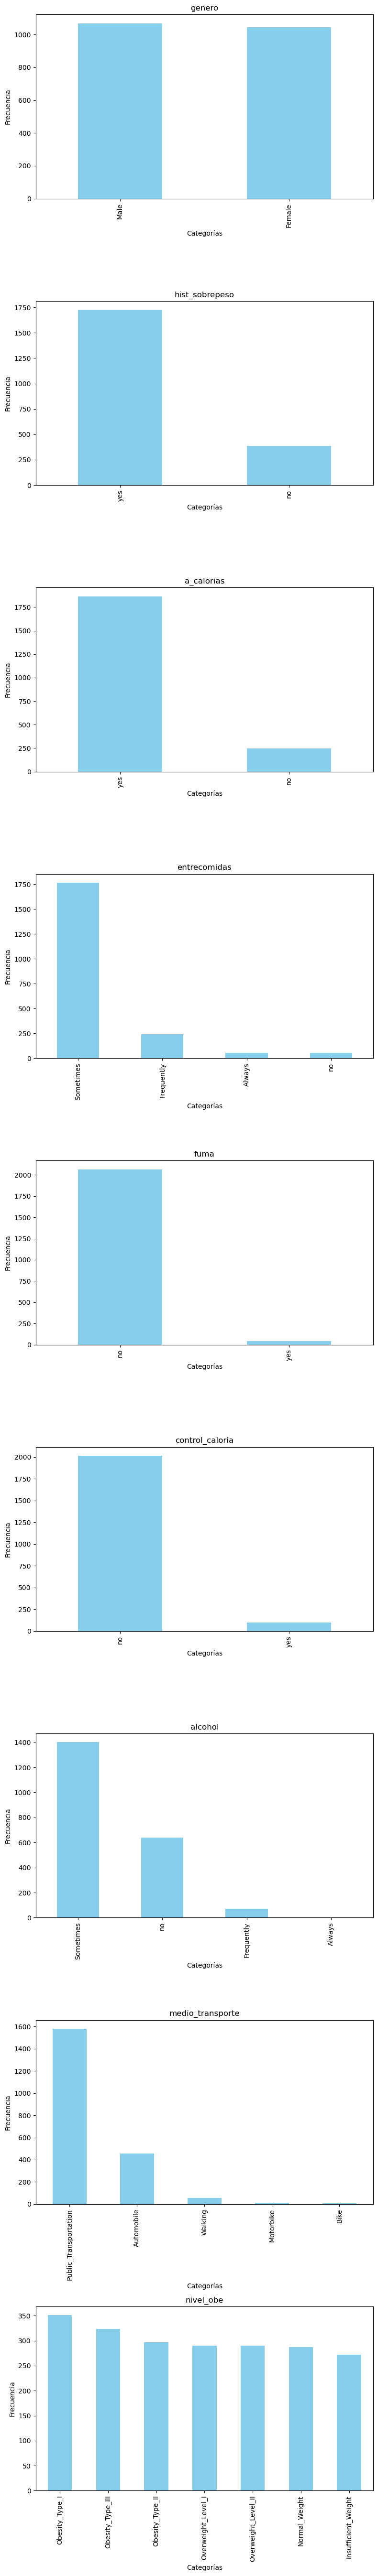

In [11]:
# Calcular filas y columnas para la disposición de subplots
num_categorias = len(df_cat.columns)
num_filas = num_categorias

# Definir tamaño y disposición de los subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=1, figsize=(8, 6*num_filas))

# Crear mini gráficos de barras para cada columna categórica
for i, col in enumerate(df_cat.columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Categorías')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Al mirar los datos cataegoricos al detalle se evidencia que por ejm la poblacion a nivel de genero esta bastante equilibrada, donde el masculino predomina por muy poco. 

En el caso de si consume calorias se evidencia que la gran mayoria de las personas consumen este tipo de almento, y se relaciona con si tiene un control a las calorias que come ya que se ve que muy pocos realmente se cuidan en ese aspecto.
son muy pocos los que fuman, asi que la obecidad no tiene relacion con este factor.

las personas en algunas ocasiones cómen mucho entre comidas, esto aporta al aumento de peso y obesidad.
los medios de transporte no influyen en el tema de obesidad ya que la poblacion latinoamericana se mueve principalmente en transporte publico.

Por ultimo vemos que el nivel de obesidad esta bastante equilibrado, predominado la obesidad tipo 1

In [12]:
    df.describe(include="number")



,edad,a_verduras,n_comidas,agua,actividad_fisica,tiempo_tecnologia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.423496,2.685628,2.008011,1.010298,0.664614
std,6.345968,0.583905,0.778039,0.612953,0.850592,0.674009
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Con los datos numericos podemos ver que la media de edad esta en 24 años, esto nos muetra que la poblacion en promedio a edades muy tempranas ya empieza a tener un peso un poco elevado a lo que deberia estar, que el numero de comidas al dia es 2,6 lo demuestra que no es que coman tanto si no que la calidad e lo que comen es bastante perjudicial para la salud. analizaremos mas al detalle esta información

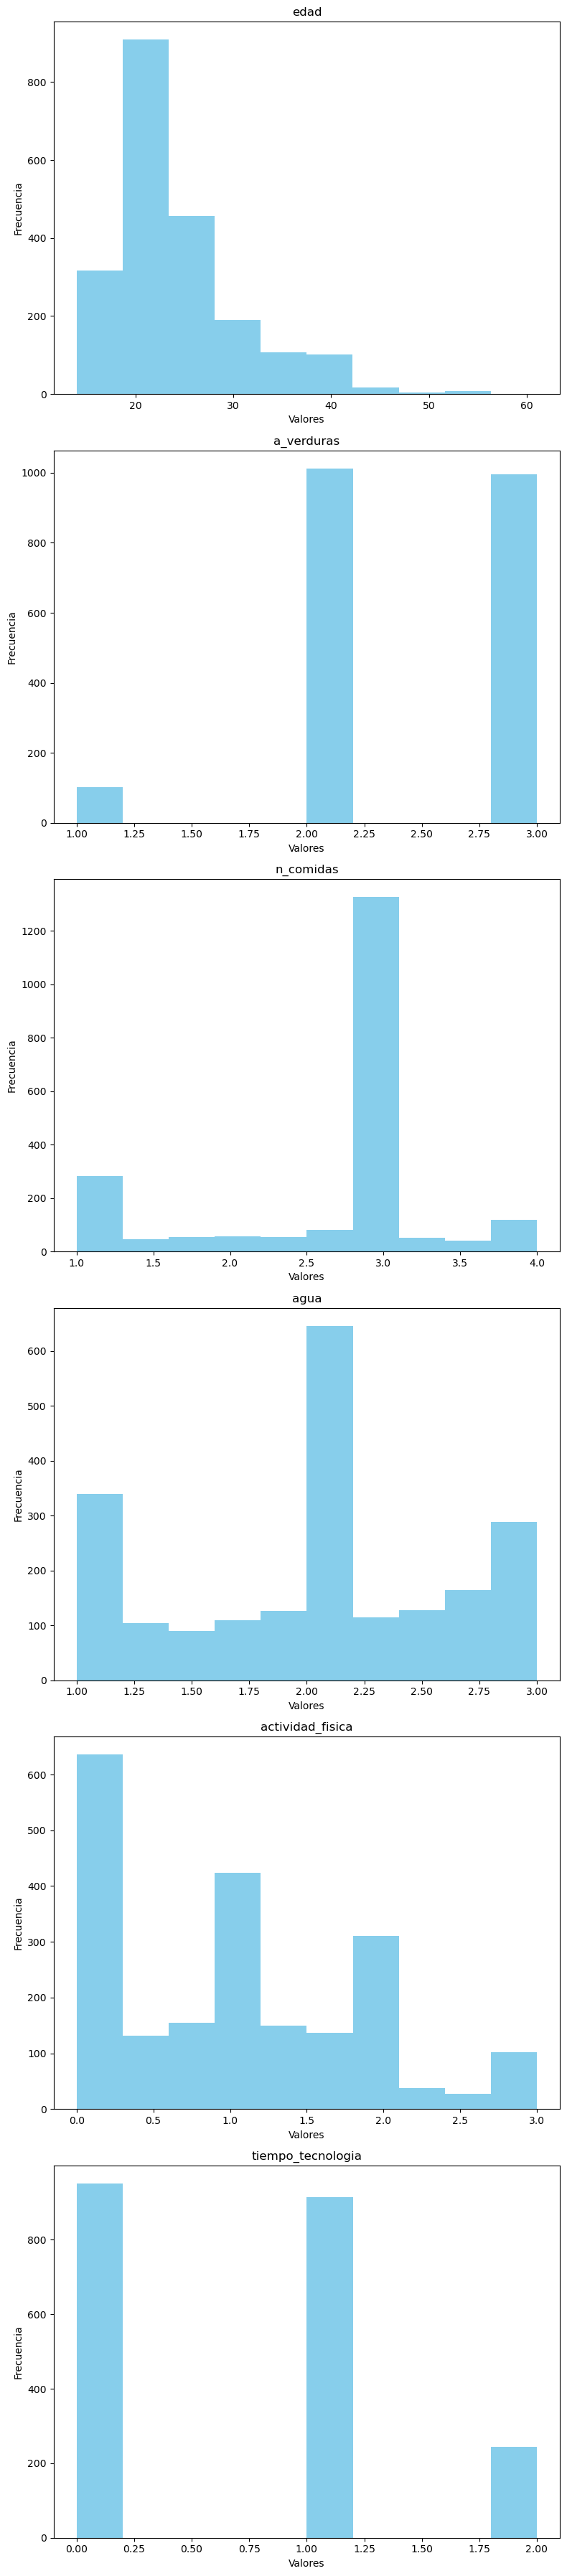

In [13]:
df_num=df.select_dtypes(include='number')
# Calcular filas y columnas para la disposición de subplots
num_categorias = len(df_num.columns)
num_filas = num_categorias

# Definir tamaño y disposición de los subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=1, figsize=(8, 6*num_filas))

# Crear histogramas para cada columna categórica
for i, col in enumerate(df_num.columns):
    df[col].hist(ax=axes[i], color='skyblue', grid=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Al revisar en detalle las variables cuantitativas se observa que la poblacion a analizar en su gran mayoria es adulta y en particular hay una gran mayoria entre 20 y 27 años, son pocos los adultos mayores.

Desde mi punto vista las verduras que consumen son pocas sin embargo la mayoria de la poblacion esta en valor maximo y el promedio de comsumo de verduras

la poblacion tiene un consumo de 3 comidas al dia lo cual es el estandar o el comun, pero sin embargo pinso que lo que comen en la mayoria de los casos contribuye al aumento de peso

el comusmo de agua es un poco bajo ayq ue lo normal es consumir mas de tres litros y la mayoria esta un c¿poco mas de 2 litros

En actividad fisica si es grave, ya que la mayoria de la poblacion no hace ni un dia de ejercicio, y lo recomendable es minimo 3 veces a la semana

Lo sorprendente es que aparentemente la mayoria de la poblacion pasa menos de 1,25 horas al dia en el telefono o otras herramientas tecnologicas







In [14]:
df

,genero,edad,hist_sobrepeso,a_calorias,a_verduras,n_comidas,entrecomidas,fuma,agua,control_caloria,actividad_fisica,tiempo_tecnologia,alcohol,medio_transporte,nivel_obe
0,Female,21.000000,yes,no,2,3.0,Sometimes,no,2.000000,no,0.000000,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3,3.0,Sometimes,yes,3.000000,yes,3.000000,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2,3.0,Sometimes,no,2.000000,no,2.000000,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3,3.0,Sometimes,no,2.000000,no,2.000000,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2,1.0,Sometimes,no,2.000000,no,0.000000,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3,3.0,Sometimes,no,1.728139,no,1.676269,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3,3.0,Sometimes,no,2.005130,no,1.341390,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3,3.0,Sometimes,no,2.054193,no,1.414209,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3,3.0,Sometimes,no,2.852339,no,1.139107,1,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
df_cat2= df_cat.drop(columns=["medio_transporte"])
df_cat2

,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,nivel_obe
0,Female,yes,no,Sometimes,no,no,no,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Obesity_Type_III


In [16]:
#creamos la lista de columnas que son binarias 
columnas_binarias=["hist_sobrepeso","a_calorias","fuma","control_caloria"]
# reemplazamos por valores 0 y 1 en las columnas binarias
df_cat2[columnas_binarias] = df_cat2[columnas_binarias].replace({'yes': 1, 'no': 0})
# creamos los diccionarios para las columnas ordinales que utilizaran para reemplazar
r_entrecomidas_alcohol={"no":0,"Sometimes":1,"Frequently":2,"Always":3}
r_nivel_obe={"Insufficient_Weight":1,"Normal_Weight":2,"Overweight_Level_I":3,"Overweight_Level_II":4,"Obesity_Type_I":5,"Obesity_Type_II":6,"Obesity_Type_III":7}
columnas_ordinales=["entrecomidas","alcohol","nivel_obe"]
#aplicamos el reemplazo a las ordinales
df_cat2['entrecomidas'] = df['entrecomidas'].replace(r_entrecomidas_alcohol)
df_cat2['alcohol'] = df['alcohol'].replace(r_entrecomidas_alcohol)
df_cat2['nivel_obe'] = df['nivel_obe'].replace(r_nivel_obe)
df_cat2




,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,nivel_obe
0,Female,1,0,1,0,0,0,2
1,Female,1,0,1,1,1,1,2
2,Male,1,0,1,0,0,2,2
3,Male,0,0,1,0,0,2,3
4,Male,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...
2106,Female,1,1,1,0,0,1,7
2107,Female,1,1,1,0,0,1,7
2108,Female,1,1,1,0,0,1,7
2109,Female,1,1,1,0,0,1,7


In [17]:
df2=pd.concat([df_num,df_cat2], axis=1)
df2

,edad,a_verduras,n_comidas,agua,actividad_fisica,tiempo_tecnologia,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,nivel_obe
0,21.000000,2,3.0,2.000000,0.000000,1,Female,1,0,1,0,0,0,2
1,21.000000,3,3.0,3.000000,3.000000,0,Female,1,0,1,1,1,1,2
2,23.000000,2,3.0,2.000000,2.000000,1,Male,1,0,1,0,0,2,2
3,27.000000,3,3.0,2.000000,2.000000,0,Male,0,0,1,0,0,2,3
4,22.000000,2,1.0,2.000000,0.000000,0,Male,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3,3.0,1.728139,1.676269,1,Female,1,1,1,0,0,1,7
2107,21.982942,3,3.0,2.005130,1.341390,1,Female,1,1,1,0,0,1,7
2108,22.524036,3,3.0,2.054193,1.414209,1,Female,1,1,1,0,0,1,7
2109,24.361936,3,3.0,2.852339,1.139107,1,Female,1,1,1,0,0,1,7


In [18]:
### Todas las categoricas las volvemos dummies
ColumnsEntrada=df2.drop('nivel_obe',axis=1).columns
ColumnsSalida='nivel_obe'

X=df2[ColumnsEntrada]
y=df2[ColumnsSalida]

X=pd.get_dummies(X)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               2111 non-null   float64
 1   a_verduras         2111 non-null   int32  
 2   n_comidas          2111 non-null   float64
 3   agua               2111 non-null   float64
 4   actividad_fisica   2111 non-null   float64
 5   tiempo_tecnologia  2111 non-null   int32  
 6   hist_sobrepeso     2111 non-null   int64  
 7   a_calorias         2111 non-null   int64  
 8   entrecomidas       2111 non-null   int64  
 9   fuma               2111 non-null   int64  
 10  control_caloria    2111 non-null   int64  
 11  alcohol            2111 non-null   int64  
 12  genero_Female      2111 non-null   bool   
 13  genero_Male        2111 non-null   bool   
dtypes: bool(2), float64(4), int32(2), int64(6)
memory usage: 185.7 KB


In [19]:
df_withtarget = pd.concat([X,df_cat['nivel_obe']], axis=1)
df_withtarget

,edad,a_verduras,n_comidas,agua,actividad_fisica,tiempo_tecnologia,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,genero_Female,genero_Male,nivel_obe
0,21.000000,2,3.0,2.000000,0.000000,1,1,0,1,0,0,0,True,False,Normal_Weight
1,21.000000,3,3.0,3.000000,3.000000,0,1,0,1,1,1,1,True,False,Normal_Weight
2,23.000000,2,3.0,2.000000,2.000000,1,1,0,1,0,0,2,False,True,Normal_Weight
3,27.000000,3,3.0,2.000000,2.000000,0,0,0,1,0,0,2,False,True,Overweight_Level_I
4,22.000000,2,1.0,2.000000,0.000000,0,0,0,1,0,0,1,False,True,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3,3.0,1.728139,1.676269,1,1,1,1,0,0,1,True,False,Obesity_Type_III
2107,21.982942,3,3.0,2.005130,1.341390,1,1,1,1,0,0,1,True,False,Obesity_Type_III
2108,22.524036,3,3.0,2.054193,1.414209,1,1,1,1,0,0,1,True,False,Obesity_Type_III
2109,24.361936,3,3.0,2.852339,1.139107,1,1,1,1,0,0,1,True,False,Obesity_Type_III


In [20]:
df_withtarget.shape

(2111, 15)

In [21]:
#df_cat3=df_cat2.drop(columns=["nivel_obe"])
#df_cat3

In [22]:
#df2 = pd.concat([df_num,df_cat3, df_cat['nivel_obe']], axis=1)
#df2

In [23]:
#df_clean = df_withtarget.replace([np.inf, -np.inf], np.nan).dropna()
#graf=sb.pairplot(df_clean ,hue='nivel_obe',height=4,vars=df_clean.columns[:-1],kind='scatter')
#graf.savefig("pairplot3.png")
#graf


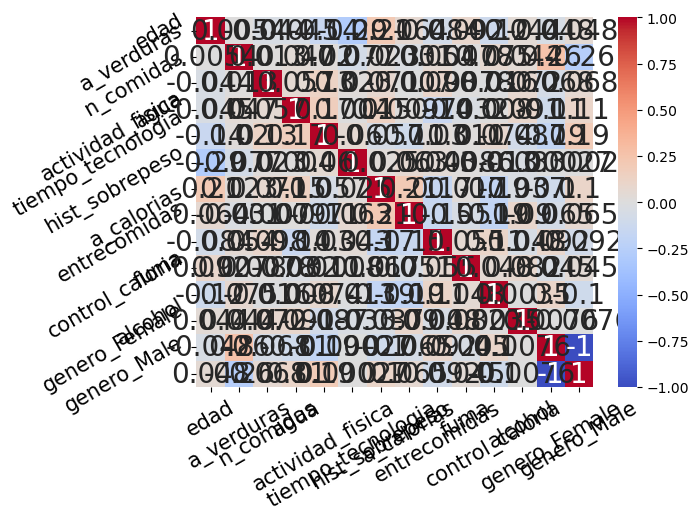

In [24]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (40,40)
s=sb.heatmap(pd.DataFrame(data=df_withtarget[df_withtarget.columns[:-1]]).corr(),cmap='coolwarm',annot=True,annot_kws={"size": 20}) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=15)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=15)
#ax.set_xlim(0,6)
#ax.set_ylim(0,6)
plt.show()

se observa una minima correlacion entre el genero femenino y comer veerduras, y entre masculino y realizar actividad fisica, historial de sobrepeso con el control de calorias, los demas su correlacion es muy baja

## Análisis de Componentes Principales

probaremos bajando la dimensionalidad de los datos, estos nos permite validar que con numero determinado de componentes permite explicar el comportamioento de los datos

In [25]:
#escalamos las variables
scaler=StandardScaler()
df_scaler= scaler.fit_transform(df_withtarget[df_withtarget.columns[:-1]])
df_scaler.shape

(2111, 14)

In [26]:
#buscamos el numero de componentes
pca = PCA(n_components=3,random_state=30)
df_pca=pca.fit_transform(df_scaler)
print(sum(pca.explained_variance_ratio_))


0.37513016027752966


In [27]:
df_pca.shape


(2111, 3)

Podemos determinar cuantos componenetes abarcan un mayor porcentanje de varianza de los datos por medio del siguiente codigo

In [28]:
nums = np.arange(14)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_scaler)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

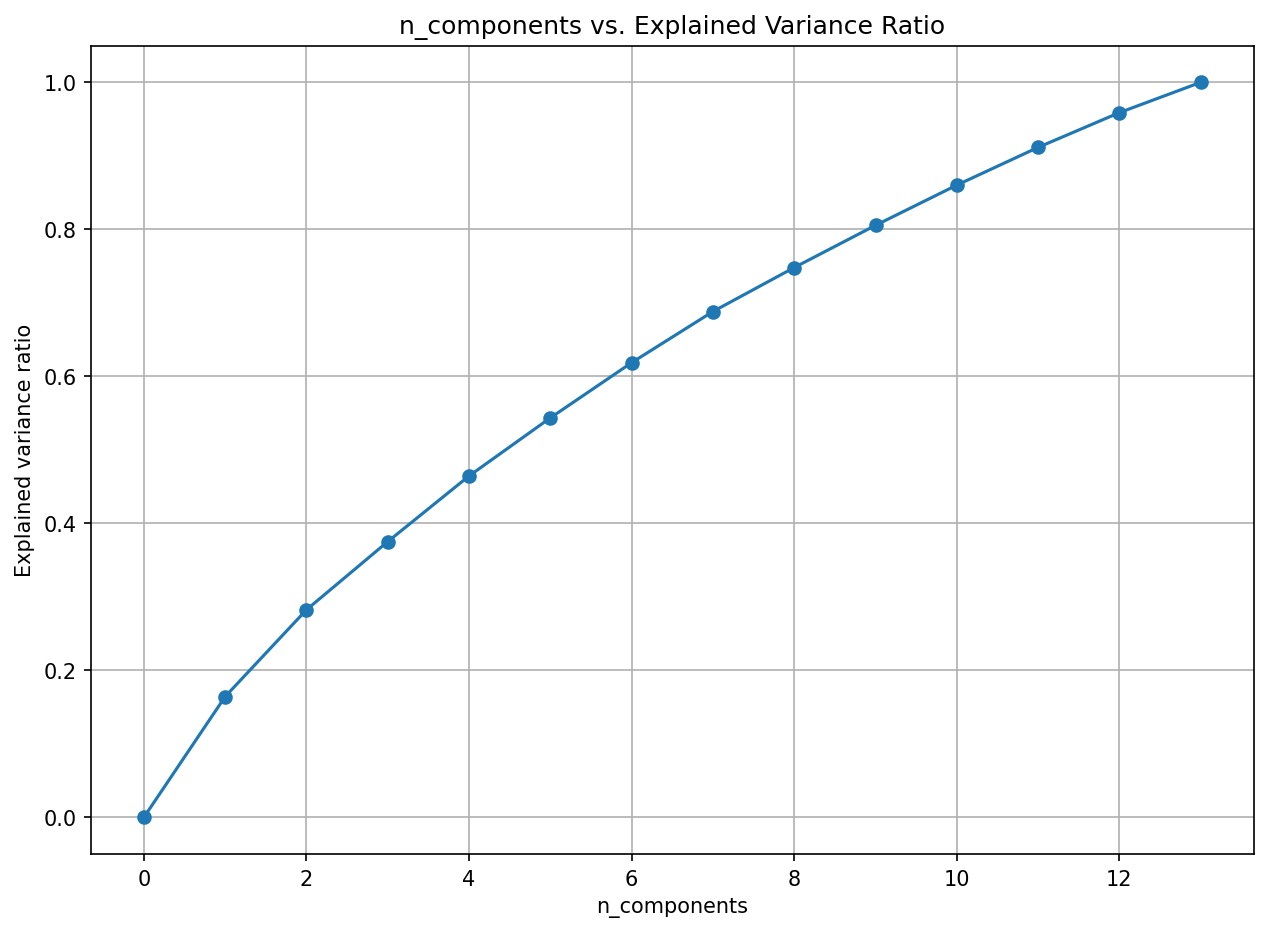

In [29]:
plt.figure(figsize=(10,7),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Vemos que con 8 componentes la variancia ya abarca casi el 80 % de conjunto de datos, pero sin embargo para verlo graficamente podemos revisar el comportamiento con 3 componentes


## K Means

Vamos a Analizar primero sin el dataset sin bajarle la dimansionalidad para ver su comportamiento, para ello tomo mi dataset X que ya esta listo con sus variables con encoding, validaremos dos metricas silueta que mayor valor el cluster sera el ideal, y Davies Buldien que entre menor sea el cluster sera el indicado, tambien revisaremos el diagram del codo para validar el nuemro de clusters

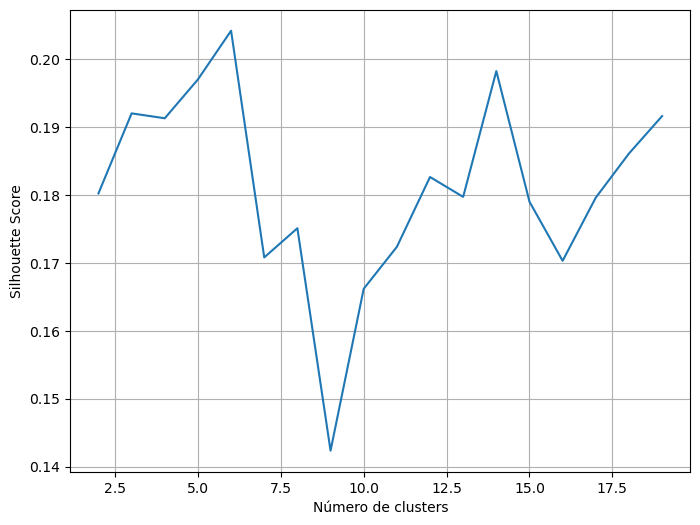

In [30]:
#### Primero hagamos unos cluster

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
## silueta score
from sklearn.metrics import silhouette_score

sc=StandardScaler()

X=sc.fit_transform(X)

list_score=[]

for n_clusters in range(2,20):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters=kmeans.predict(X)
    silhouette_avg=silhouette_score(X,clusters)
    list_score.append((n_clusters,silhouette_avg))
plt.figure(figsize=(8, 6))
plt.plot([x[0] for x in list_score],[x[1] for x in list_score])
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

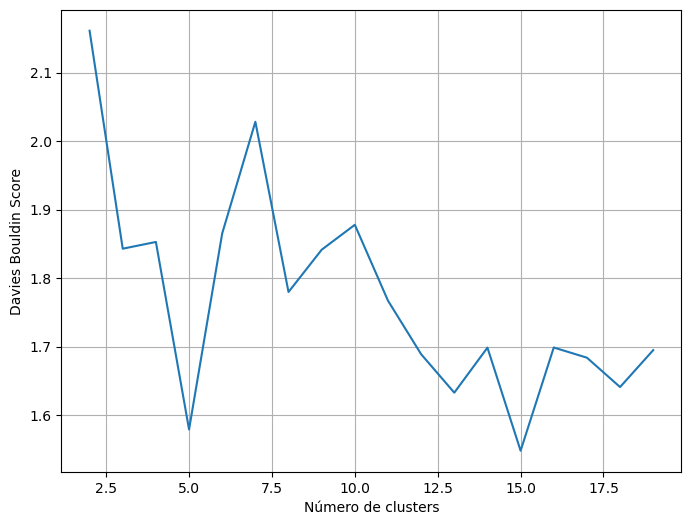

In [31]:
### Ahora usemos indice de Davies Bouldin

from sklearn.metrics import davies_bouldin_score

list_score=[]
for n_clusters in range(2,20):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters=kmeans.predict(X)
    db=davies_bouldin_score(X,clusters)
    list_score.append((n_clusters,db))
plt.figure(figsize=(8, 6))
plt.plot([x[0] for x in list_score],[x[1] for x in list_score])
plt.xlabel('Número de clusters')
plt.ylabel('Davies Bouldin Score')
plt.grid()
plt.show()

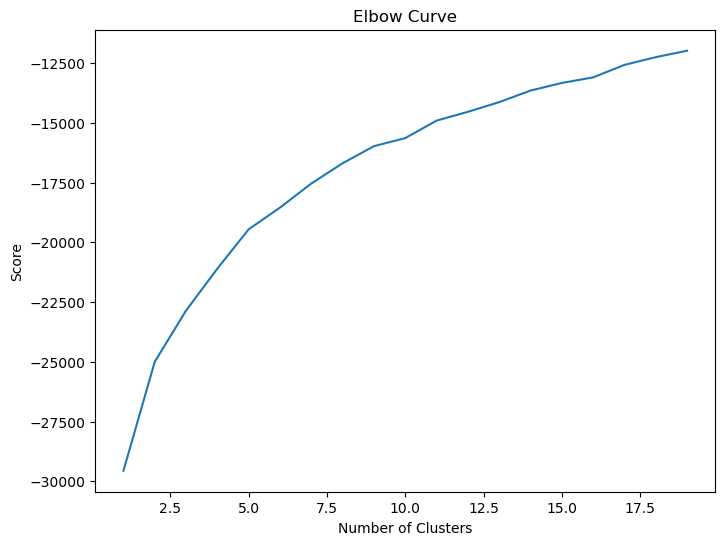

In [32]:
#Diagrama de codo
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.figure(figsize=(8, 6))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Vemos que un nuemro aceptable de cluster pude ser 10, validemos que sucede con este nuemro de clusters

Text(0, 0.5, 'Número de muestra')

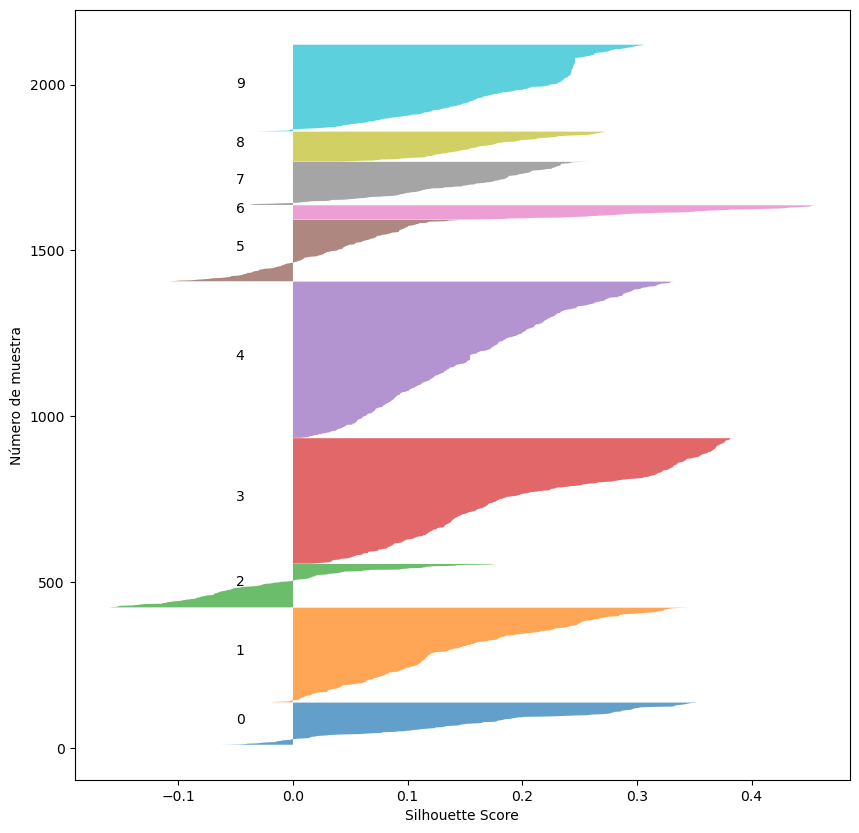

In [33]:
### Vamos a usar 10 cluster y graficacamos siluetas
from sklearn.metrics import silhouette_samples

kmeans=KMeans(n_clusters=10,random_state=0)

kmeans.fit(X)

clusters=kmeans.predict(X)

silhouette_samples_kmeans=silhouette_samples(X,clusters)

plt.figure(figsize=(10,10))
y_lower=10
for i in range(10):
    cluster_i=silhouette_samples_kmeans[clusters==i]
    cluster_i.sort()
    y_upper=y_lower+cluster_i.shape[0]
    plt.fill_betweenx(np.arange(y_lower,y_upper),0,cluster_i,alpha=0.7)
    plt.text(-0.05,y_lower+0.5*cluster_i.shape[0],str(i))
    y_lower=y_upper

plt.xlabel('Silhouette Score')
plt.ylabel('Número de muestra')


<Axes: xlabel='Cluster', ylabel='count'>

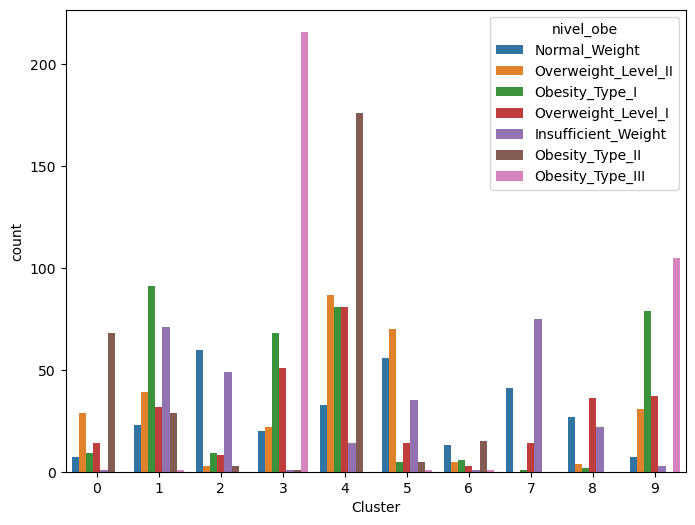

In [34]:
df['Cluster']=clusters

### Ahora vamos a estudiar la relación entre el cluster y la variable objetivo
plt.figure(figsize=(8, 6))
sb.countplot(data=df,x='Cluster',hue='nivel_obe')

revisemos al detalle algunos clusters

In [35]:
# analicemos el cluster3
Data_clus3=df[df['Cluster']==3]

Data_clus3['nivel_obe'].value_counts()

nivel_obe
Obesity_Type_III       216
Obesity_Type_I          68
Overweight_Level_I      51
Overweight_Level_II     22
Normal_Weight           20
Insufficient_Weight      1
Obesity_Type_II          1
Name: count, dtype: int64

In [36]:
Data_clus3.describe(include='all')

,genero,edad,hist_sobrepeso,a_calorias,a_verduras,n_comidas,entrecomidas,fuma,agua,control_caloria,actividad_fisica,tiempo_tecnologia,alcohol,medio_transporte,nivel_obe,Cluster
count,379,379.000000,379,379,379.000000,379.000000,379,379,379.000000,379,379.000000,379.000000,379,379,379,379.0
unique,1,NaN,1,1,NaN,NaN,3,1,NaN,1,NaN,NaN,3,4,7,NaN
top,Female,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III,NaN
freq,379,NaN,379,379,NaN,NaN,369,379,NaN,379,NaN,NaN,290,363,216,NaN
mean,NaN,21.862263,NaN,NaN,2.696570,2.740789,NaN,NaN,2.058518,NaN,1.038054,0.965699,NaN,NaN,NaN,3.0
std,NaN,3.054799,NaN,NaN,0.539708,0.669802,NaN,NaN,0.633528,NaN,0.772574,0.461634,NaN,NaN,NaN,0.0
min,NaN,15.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,3.0
25%,NaN,19.402935,NaN,NaN,2.000000,3.000000,NaN,NaN,1.519821,NaN,0.246561,1.000000,NaN,NaN,NaN,3.0
50%,NaN,21.322097,NaN,NaN,3.000000,3.000000,NaN,NaN,2.085553,NaN,1.000000,1.000000,NaN,NaN,NaN,3.0
75%,NaN,23.607609,NaN,NaN,3.000000,3.000000,NaN,NaN,2.615107,NaN,1.580249,1.000000,NaN,NaN,NaN,3.0


Observamos que en este cluster solo hay mujeres que en prom,edio son bastante jovenes con 21 años, tiene en su mayoria un hiostorial de sobrepeso y que se alimentan bastantes calorias, a pesar que su consumo de verduras es alto, no fuma nunguna, poca actividad fisica.

In [37]:
# analicemos el cluster7
Data_clus7=df[df['Cluster']==7]

Data_clus7['nivel_obe'].value_counts()

nivel_obe
Insufficient_Weight    75
Normal_Weight          41
Overweight_Level_I     14
Obesity_Type_I          1
Name: count, dtype: int64

In [38]:
Data_clus7.describe(include='all')

,genero,edad,hist_sobrepeso,a_calorias,a_verduras,n_comidas,entrecomidas,fuma,agua,control_caloria,actividad_fisica,tiempo_tecnologia,alcohol,medio_transporte,nivel_obe,Cluster
count,131,131.000000,131,131,131.000000,131.000000,131,131,131.000000,131,131.000000,131.000000,131,131,131,131.0
unique,2,NaN,1,1,NaN,NaN,3,1,NaN,1,NaN,NaN,3,3,4,NaN
top,Female,NaN,no,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Insufficient_Weight,NaN
freq,130,NaN,131,131,NaN,NaN,98,131,NaN,131,NaN,NaN,108,116,75,NaN
mean,NaN,20.433611,NaN,NaN,2.427481,2.345359,NaN,NaN,1.482867,NaN,0.872842,0.824427,NaN,NaN,NaN,7.0
std,NaN,3.977534,NaN,NaN,0.668299,1.030114,NaN,NaN,0.533681,NaN,0.956210,0.695932,NaN,NaN,NaN,0.0
min,NaN,16.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,7.0
25%,NaN,18.284649,NaN,NaN,2.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,7.0
50%,NaN,19.314964,NaN,NaN,3.000000,3.000000,NaN,NaN,1.310074,NaN,0.523847,1.000000,NaN,NaN,NaN,7.0
75%,NaN,21.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,1.998872,NaN,2.000000,1.000000,NaN,NaN,NaN,7.0


En este caso tenemos un lcuster que no sufre tanto de obesidad, en su gran mayotia mujeres que no tiene historial de sobrepeso, pero que alimentacion no es buena.

In [39]:
# analicemos el cluster1
Data_clus1=df[df['Cluster']==1]

Data_clus1['nivel_obe'].value_counts()

nivel_obe
Obesity_Type_I         91
Insufficient_Weight    71
Overweight_Level_II    39
Overweight_Level_I     32
Obesity_Type_II        29
Normal_Weight          23
Obesity_Type_III        1
Name: count, dtype: int64

In [40]:
Data_clus1.describe(include='all')

,genero,edad,hist_sobrepeso,a_calorias,a_verduras,n_comidas,entrecomidas,fuma,agua,control_caloria,actividad_fisica,tiempo_tecnologia,alcohol,medio_transporte,nivel_obe,Cluster
count,286,286.000000,286,286,286.000000,286.000000,286,286,286.000000,286,286.000000,286.000000,286,286,286,286.0
unique,1,NaN,2,2,NaN,NaN,2,1,NaN,1,NaN,NaN,3,3,7,NaN
top,Male,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,no,Public_Transportation,Obesity_Type_I,NaN
freq,286,NaN,269,284,NaN,NaN,277,286,NaN,286,NaN,NaN,153,211,91,NaN
mean,NaN,21.318247,NaN,NaN,2.234266,3.003443,NaN,NaN,2.224349,NaN,1.432108,1.321678,NaN,NaN,NaN,1.0
std,NaN,3.765486,NaN,NaN,0.500190,0.584031,NaN,NaN,0.450006,NaN,0.873791,0.628017,NaN,NaN,NaN,0.0
min,NaN,14.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.0
25%,NaN,18.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,2.000000,NaN,0.923334,1.000000,NaN,NaN,NaN,1.0
50%,NaN,21.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,2.042292,NaN,1.590295,1.000000,NaN,NaN,NaN,1.0
75%,NaN,23.000000,NaN,NaN,3.000000,3.000000,NaN,NaN,2.521931,NaN,2.000000,2.000000,NaN,NaN,NaN,1.0


En este grupo tenemos todos hombre que en su gran amyoria tiene un historial de sobrepeso, tiene una mala alimentacioncombinada sin un control de calorias y con bajo ejercicios

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
df2

,edad,a_verduras,n_comidas,agua,actividad_fisica,tiempo_tecnologia,genero,hist_sobrepeso,a_calorias,entrecomidas,fuma,control_caloria,alcohol,nivel_obe
0,21.000000,2,3.0,2.000000,0.000000,1,Female,1,0,1,0,0,0,2
1,21.000000,3,3.0,3.000000,3.000000,0,Female,1,0,1,1,1,1,2
2,23.000000,2,3.0,2.000000,2.000000,1,Male,1,0,1,0,0,2,2
3,27.000000,3,3.0,2.000000,2.000000,0,Male,0,0,1,0,0,2,3
4,22.000000,2,1.0,2.000000,0.000000,0,Male,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3,3.0,1.728139,1.676269,1,Female,1,1,1,0,0,1,7
2107,21.982942,3,3.0,2.005130,1.341390,1,Female,1,1,1,0,0,1,7
2108,22.524036,3,3.0,2.054193,1.414209,1,Female,1,1,1,0,0,1,7
2109,24.361936,3,3.0,2.852339,1.139107,1,Female,1,1,1,0,0,1,7


In [43]:
### Todas las categoricas las volvemos dummies
ColumnsEntrada=df2.drop('nivel_obe',axis=1).columns
ColumnsSalida='nivel_obe'

X=df2[ColumnsEntrada]
y=df2[ColumnsSalida]

X=pd.get_dummies(X)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               2111 non-null   float64
 1   a_verduras         2111 non-null   int32  
 2   n_comidas          2111 non-null   float64
 3   agua               2111 non-null   float64
 4   actividad_fisica   2111 non-null   float64
 5   tiempo_tecnologia  2111 non-null   int32  
 6   hist_sobrepeso     2111 non-null   int64  
 7   a_calorias         2111 non-null   int64  
 8   entrecomidas       2111 non-null   int64  
 9   fuma               2111 non-null   int64  
 10  control_caloria    2111 non-null   int64  
 11  alcohol            2111 non-null   int64  
 12  genero_Female      2111 non-null   bool   
 13  genero_Male        2111 non-null   bool   
dtypes: bool(2), float64(4), int32(2), int64(6)
memory usage: 185.7 KB


In [44]:
scaler=StandardScaler()
X= scaler.fit_transform(X)

busquemos que hiperparametros nos conviene mas para este modelo

In [45]:
list_score=[]

for eps in np.arange(2,10,0.1):
    for min_samples in range(5,10):
        df_temp=pd.DataFrame()
        dbscan=DBSCAN(eps=eps,min_samples=min_samples)
        clusters=dbscan.fit_predict(X)
        ## Quitar los ruidos
        mask=clusters!=-1
        X_DF=pd.DataFrame(X)
        X_DF=X_DF[mask]
        clusters=clusters[mask]

        ## Valores_cluster
        df_temp['Cluster']=clusters
        cluster_count=len(np.unique(clusters))
        valor_maximo_cluster=df_temp['Cluster'].value_counts().max()    
        if len(np.unique(clusters))>=1:
            if valor_maximo_cluster<1000:
                silhouette_avg=silhouette_score(X_DF,clusters)
                list_score.append((eps,min_samples,silhouette_avg,cluster_count))

list_score

[(2.0, 5, 0.1336035972706675, 20),
 (2.0, 6, 0.20767653179347295, 19),
 (2.0, 7, 0.2348966308659111, 15),
 (2.0, 8, 0.23774315539044852, 14),
 (2.0, 9, 0.2376477895801731, 11),
 (2.1, 5, 0.1313424491589433, 22),
 (2.1, 6, 0.17517695099246372, 21),
 (2.1, 7, 0.21418915916316358, 17),
 (2.1, 8, 0.23563843338225038, 14),
 (2.1, 9, 0.23406256632755643, 13),
 (2.2, 5, 0.19399255038835173, 15),
 (2.2, 6, 0.19737368139709618, 16),
 (2.2, 7, 0.2159010688071243, 15),
 (2.2, 8, 0.2294664220570552, 13),
 (2.2, 9, 0.2269312784036693, 14),
 (2.3000000000000003, 5, 0.24116524946576473, 13),
 (2.3000000000000003, 6, 0.23192267719669585, 13),
 (2.3000000000000003, 7, 0.19856062217522494, 14),
 (2.3000000000000003, 8, 0.24859932951754685, 10),
 (2.3000000000000003, 9, 0.23394829771179593, 11),
 (2.4000000000000004, 5, 0.2416014805633428, 13),
 (2.4000000000000004, 6, 0.23083578221775755, 13),
 (2.4000000000000004, 7, 0.23272370385715574, 13),
 (2.4000000000000004, 8, 0.23818672317656803, 12),
 (2.40000

In [46]:
### Extraemos los 3 mejores

list_score.sort(key=lambda x: x[2],reverse=True)

list_score[:10]

[(2.3000000000000003, 8, 0.24859932951754685, 10),
 (2.5000000000000004, 9, 0.24808306496960555, 10),
 (2.4000000000000004, 9, 0.2471363262624599, 10),
 (2.5000000000000004, 5, 0.24520646933211357, 12),
 (2.4000000000000004, 5, 0.2416014805633428, 13),
 (2.3000000000000003, 5, 0.24116524946576473, 13),
 (2.5000000000000004, 6, 0.2382398086827496, 13),
 (2.4000000000000004, 8, 0.23818672317656803, 12),
 (2.5000000000000004, 8, 0.23814978202827825, 12),
 (2.0, 8, 0.23774315539044852, 14)]

In [47]:
dbscan=DBSCAN(eps=2.3,min_samples=8)

clusters=dbscan.fit_predict(X)

df['Cluster_DBSCAN']=clusters

df['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 2    787
 1    680
-1    320
 3    118
 4     69
 0     44
 5     29
 6     27
 9     14
 8     14
 7      9
Name: count, dtype: int64

Text(0, 0.5, 'Número de muestra')

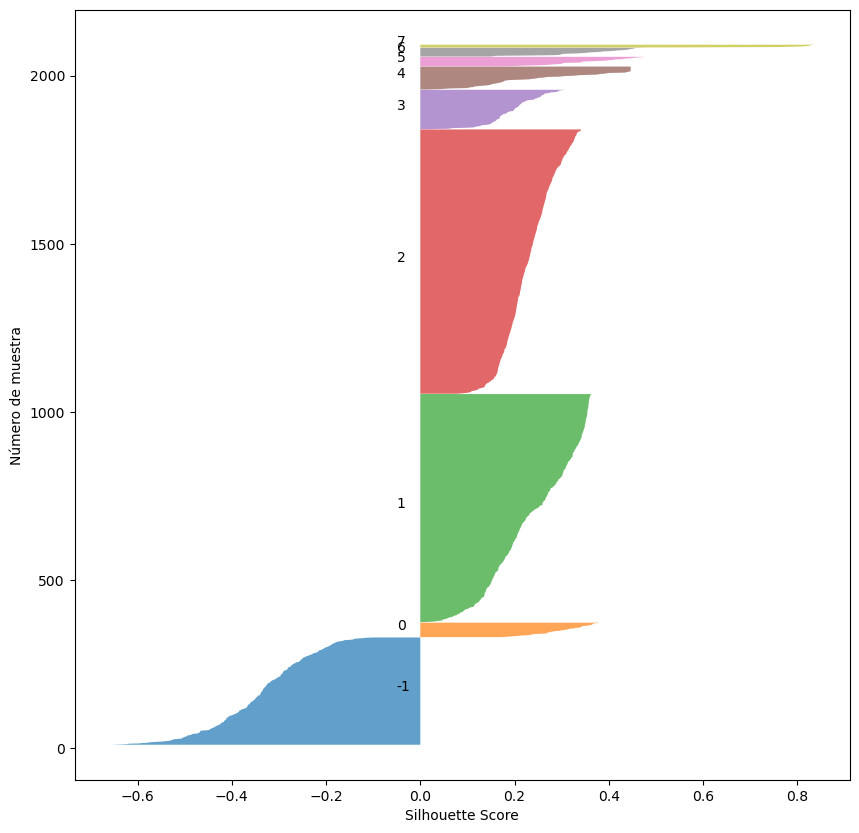

In [48]:
### Silueta Samples

silhouette_samples_dbscan=silhouette_samples(X,clusters)

plt.figure(figsize=(10,10))
y_lower=10

for i in range(-1,8):
    cluster_i=silhouette_samples_dbscan[clusters==i]
    cluster_i.sort()
    y_upper=y_lower+cluster_i.shape[0]
    plt.fill_betweenx(np.arange(y_lower,y_upper),0,cluster_i,alpha=0.7)
    plt.text(-0.05,y_lower+0.5*cluster_i.shape[0],str(i))
    y_lower=y_upper

plt.xlabel('Silhouette Score')
plt.ylabel('Número de muestra')

<Axes: xlabel='Cluster_DBSCAN', ylabel='count'>

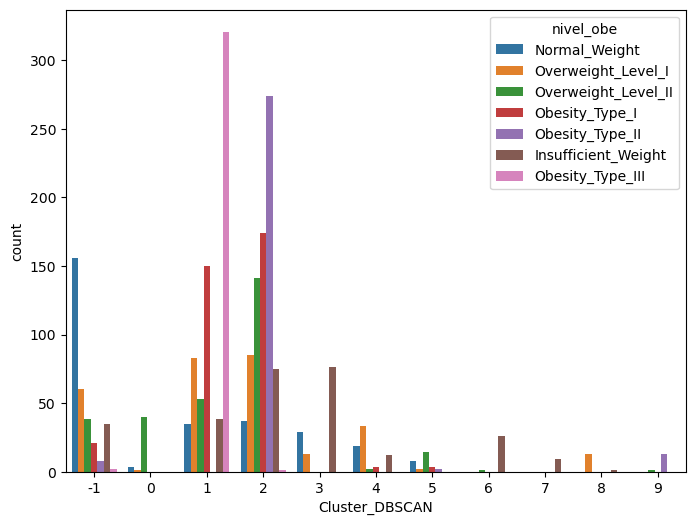

In [49]:
## Estudiamos la relación entre el cluster dbscan y la variable objetivo
plt.figure(figsize=(8, 6))
sb.countplot(data=df,x='Cluster_DBSCAN',hue='nivel_obe')

en el caos del Modelo DBSACAN, vemos que pudo agrupar mejor la obecidad tipo 3 en el cluster 1 y en el cluster 2 los de tipo 1, esto con el analisis de silueta indicaba que eran donde mas dtos hay los otros cluster no tiene muchos datos. pero lo precupante aqui  es que hay bastantes datos atipicos, sobre todos de nivel normal.

### Prueba con df con dimensionalidad 3

utilizaremos el df_pca para poder determinar si al tomar menos componentes nos permite tener un modelo mas acertado

In [50]:
df_pca.shape

(2111, 3)

In [51]:
df_pca

array([[ 1.45838064,  0.55520257,  0.11931281],
       [ 1.6932875 ,  3.06037943,  1.67814063],
       [-1.42881765,  1.3862309 ,  0.22193014],
       ...,
       [ 1.17733622, -0.45698187, -1.37924414],
       [ 1.00685427, -0.70872677, -1.72469218],
       [ 1.03441541, -0.71242881, -1.7514499 ]])

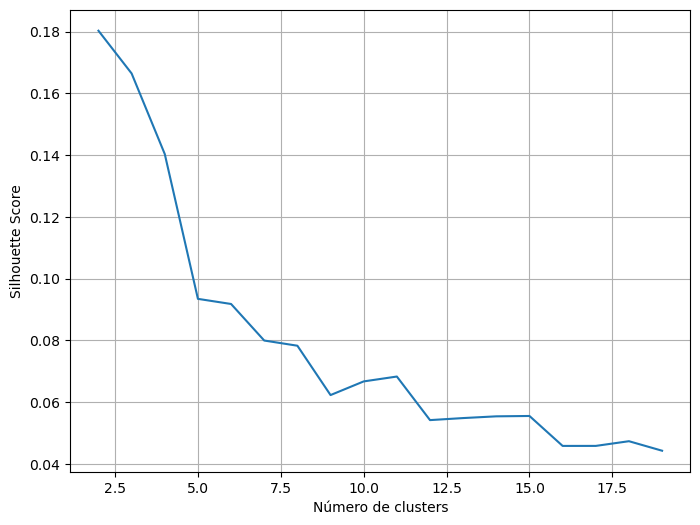

In [52]:
sc=StandardScaler()

df_pca=sc.fit_transform(df_pca)

list_score=[]

for n_clusters in range(2,20):
    kmeans=KMeans(n_clusters=n_clusters)
    kmeans.fit(df_pca)
    clusters=kmeans.predict(df_pca)
    silhouette_avg=silhouette_score(X,clusters)
    list_score.append((n_clusters,silhouette_avg))
plt.figure(figsize=(8, 6))
plt.plot([x[0] for x in list_score],[x[1] for x in list_score])
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

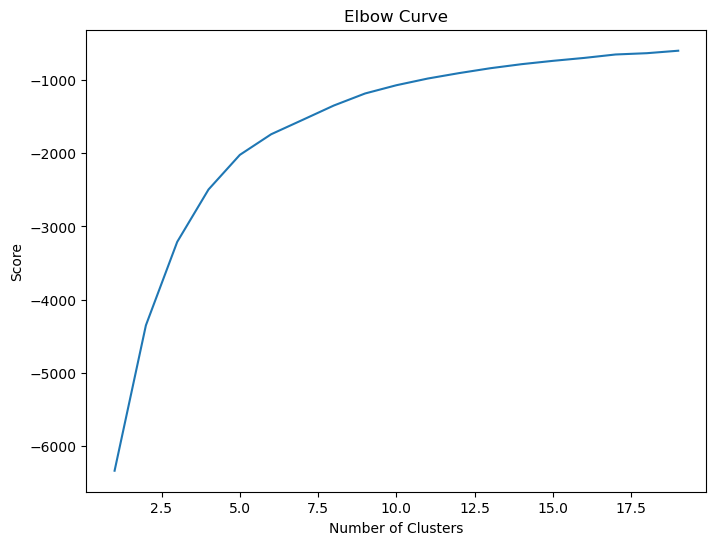

In [53]:
#Diagrama de codo
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df_pca).score(df_pca) for i in range(len(kmeans))]
score
plt.figure(figsize=(8, 6))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Vemos que 5 seria el numero mas adecuado de cluster, asi que trabajemos con el 

In [54]:
kmeans = KMeans(n_clusters=5,random_state=30).fit(df_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.01888864  0.42706926 -0.58374924]
 [ 0.86023438 -1.11834591  0.32518941]
 [ 0.94543616  1.56841508  0.92128971]
 [ 0.80085563 -0.04477545 -1.01883286]
 [-0.9325697  -0.38413561  0.75992613]]


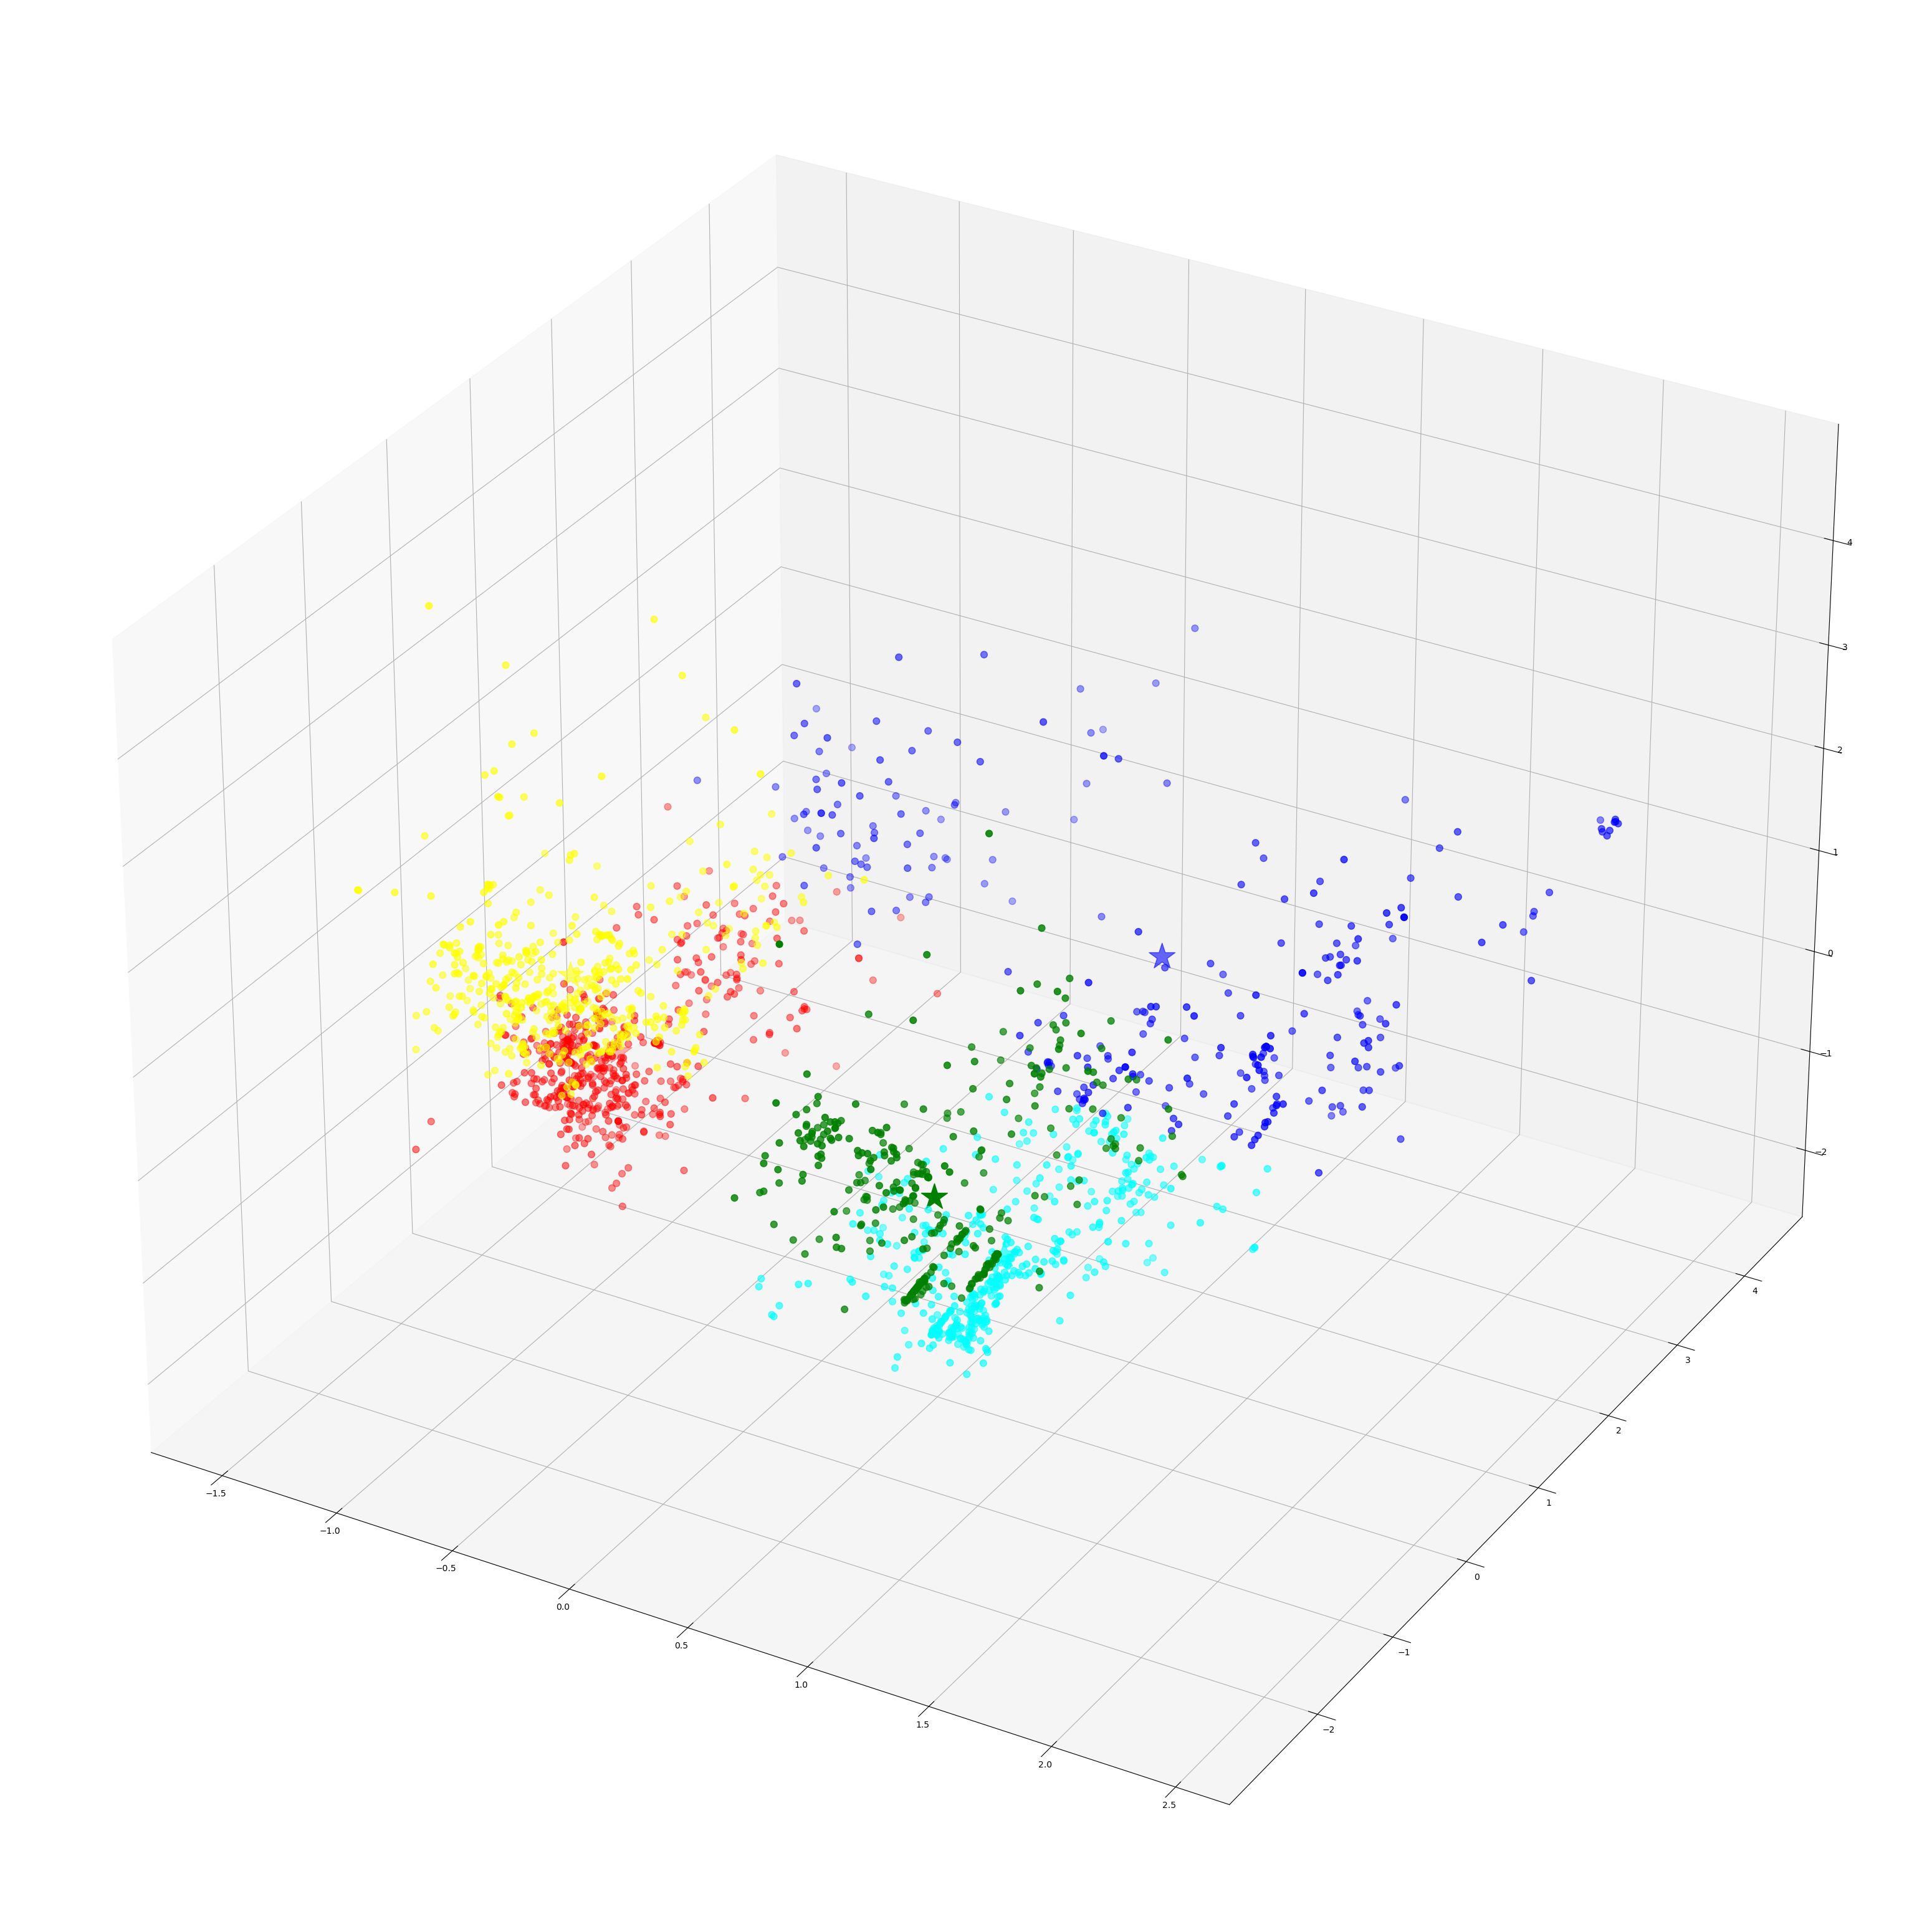

In [55]:


labels = kmeans.predict(df_pca)
# Obtener cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

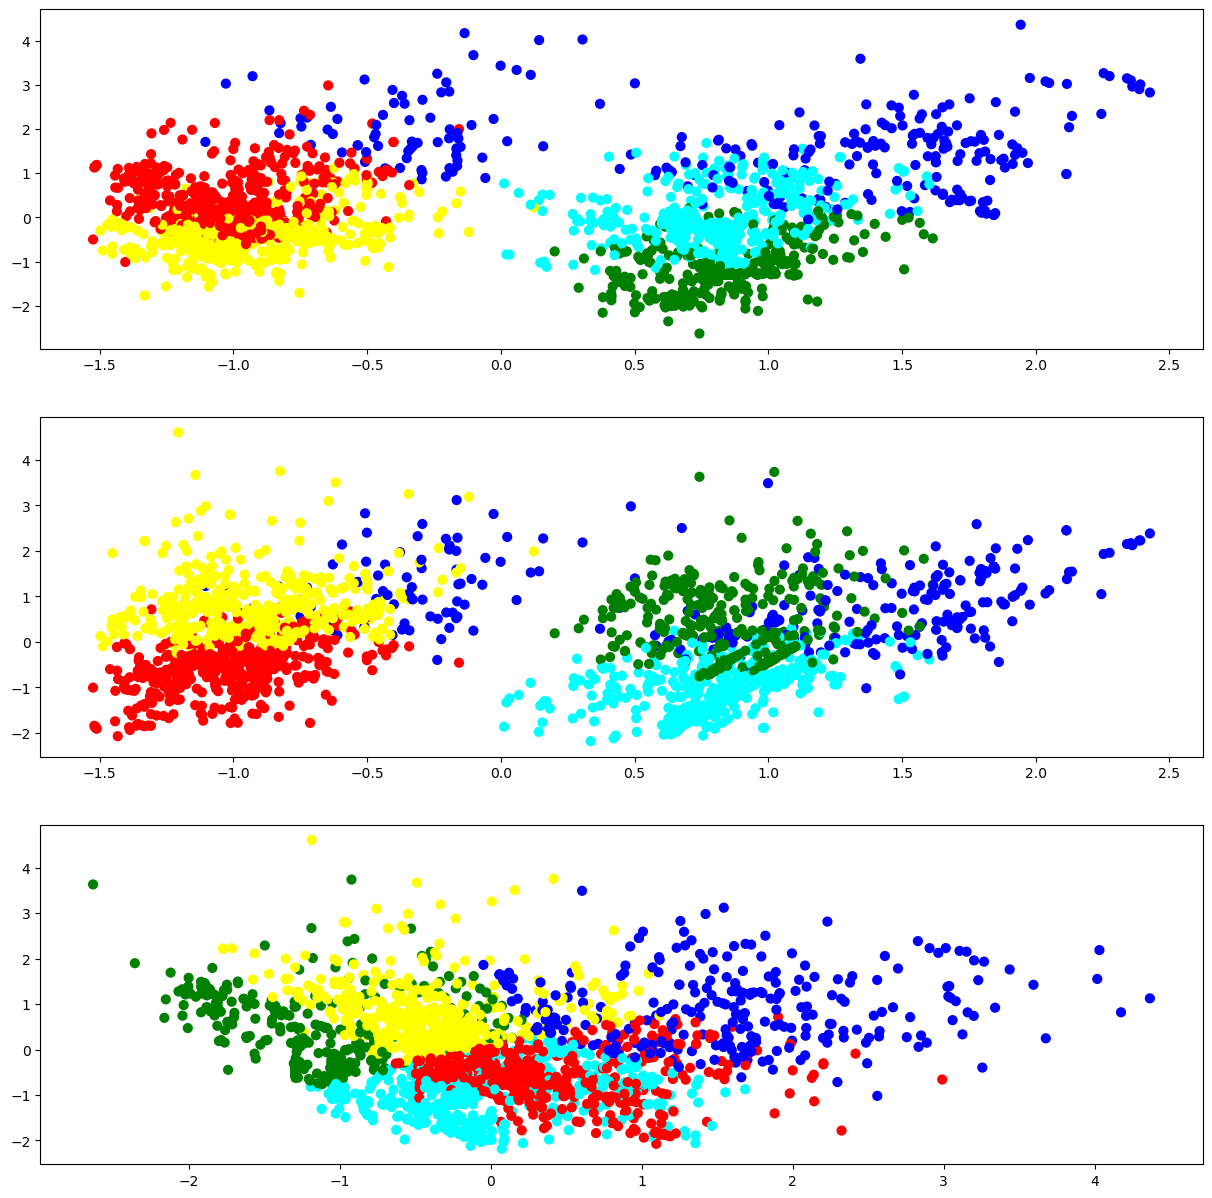

In [56]:
fig, axs= plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0].scatter(df_pca[:,0],df_pca[:,1],c=asignar,s=40)
#axs[0].scatter(C[:,0],C[:,1],c='Red',s=2500,marker="*")
axs[1].scatter(df_pca[:,0],df_pca[:,2],c=asignar,s=40)
#axs[1].scatter(C[:,0],C[:,2],c='Red',s=2500,marker="*")
axs[2].scatter(df_pca[:,1],df_pca[:,2],c=asignar,s=40)
#axs[2].scatter(C[:,1],C[:,2],c='Red',s=2500,marker="*")
plt.show()

al aver reducido la dimencionalidad nos permitio ver como se ven mejor cada cluster dependiendo las perspectivas tomas

In [57]:
#creamos la prediccion de cluster en df original
df['Cluster_knrd']=labels

df['Cluster_knrd'].value_counts()

Cluster_knrd
0    500
4    487
3    453
1    394
2    277
Name: count, dtype: int64

<Axes: xlabel='Cluster_knrd', ylabel='count'>

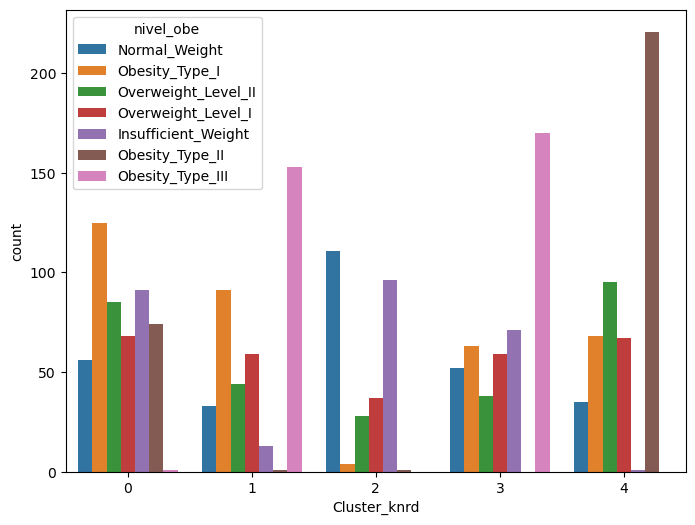

In [58]:
## Estudiamos la relación entre el cluster k-mean con reduccion de dimension y la variable objetivo
plt.figure(figsize=(8, 6))
sb.countplot(data=df,x='Cluster_knrd',hue='nivel_obe')

## Conclusión

Con este datasetr de Obesisdad, encontramos que, por medio algunos habitos que stan un poco relacionas , como el genero y el tipo de actividad fisca o si se cuidaba de su alimentacion, por agrupar gracias estos habitos, el modelo trata de hacerlo lo mejhor que puede sin embargo , el numero de posibles cluster y caracteristicas siempre se complica la prediccion,pero cuando aplicamos PCA y se redujo la dimensionalidad nos permitio hacer un agrupamiento mas claro, donde en cluster 4 se mostro que los habitos de estas personas conducen a una obesidad tipo2